In [417]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
df=pd.read_csv('datasets/milk_prod/monthly-milk-production.csv', index_col=['Month'],
              parse_dates=['Month'])

In [418]:
#Creating train and test set 
split_point=len(df) - 12
train=df[0:split_point]
test=df[split_point:]

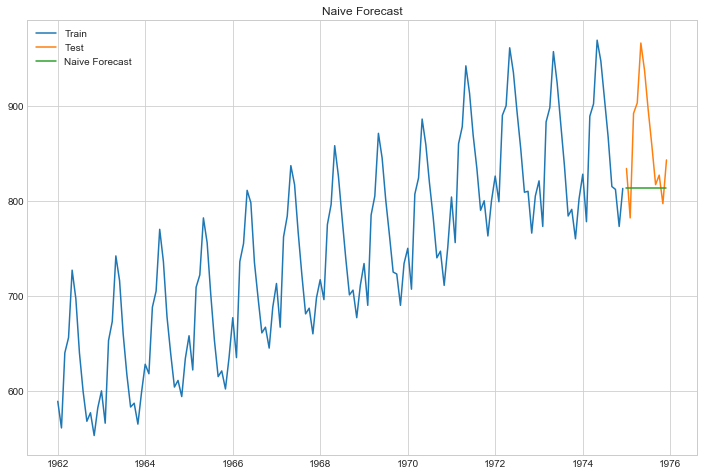

In [419]:
#Baseline - NAIVE APPROACH
#This forecasting technique assumes that the next expected point is equal to the last observed point.
dd= np.asarray(train.MilkProd)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['MilkProd'], label='Train')
plt.plot(test.index,test['MilkProd'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [420]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.MilkProd, y_hat.naive))
print(rms)

73.4903621799031


In [421]:
#Baseline - NAIVE APPROACH
#This forecasting technique assumes that the next expected point is equal to the last observed point.
dd= np.asarray(train.MilkProd)
#dt=np.asarray(test.MilkProd)
#-----------------------------------------
history = [x for x in dd]
#print(history)
predictions=list()
naive_list=list()
#rmse function
def h_rmse(prediction, target):
    return sqrt(((prediction - target) ** 2).mean())

#print(len(test))

for i in range(len(test)): #y_hat = test.copy()
    #predict
    y_hat=history[-1]
    #print(yhat)
    predictions.append(y_hat) #y_hat['naive']
    #print(predictions)
    #observation
    obs=dt[i]
    #print(obs)
    history.append(obs)
    #check=history[-1]
    #print(y_hat, obs)
    #print(history)
    rmse=h_rmse(y_hat,obs)
    naive_list.append(rmse)
    print('>Predicted=%.3f, Expected=%3.f, RMSE=%.3f' % (y_hat, obs, rmse))
#-----------------------------------------
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
#RMSE = (21^2)+(52^2)+...+(46^2)/12 = 2341.5
#RMSE = 2341.5^1/2 i.e. square root of 2341.5 = 48.389

>Predicted=813.000, Expected=834, RMSE=21.000
>Predicted=834.000, Expected=782, RMSE=52.000
>Predicted=782.000, Expected=892, RMSE=110.000
>Predicted=892.000, Expected=903, RMSE=11.000
>Predicted=903.000, Expected=966, RMSE=63.000
>Predicted=966.000, Expected=937, RMSE=29.000
>Predicted=937.000, Expected=896, RMSE=41.000
>Predicted=896.000, Expected=858, RMSE=38.000
>Predicted=858.000, Expected=817, RMSE=41.000
>Predicted=817.000, Expected=827, RMSE=10.000
>Predicted=827.000, Expected=797, RMSE=30.000
>Predicted=797.000, Expected=843, RMSE=46.000
RMSE: 48.389


In [422]:
print(naive_list)

[21.0, 52.0, 110.0, 11.0, 63.0, 29.0, 41.0, 38.0, 41.0, 10.0, 30.0, 46.0]


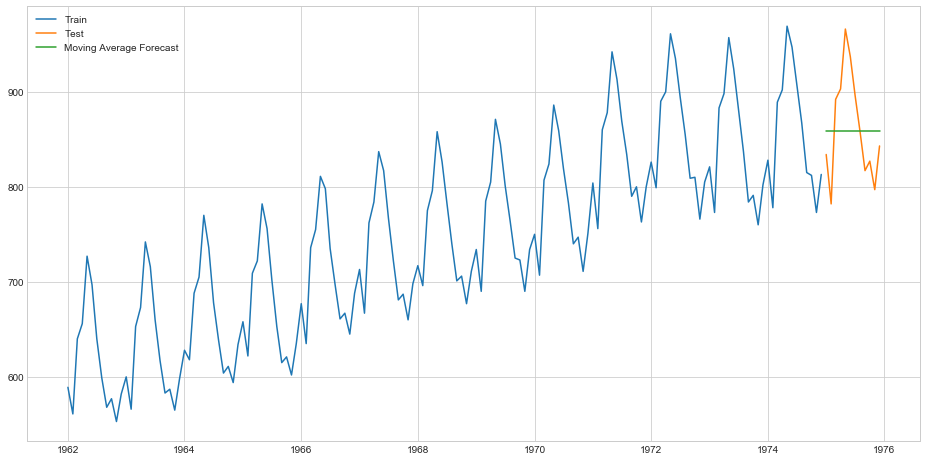

In [423]:
#MOVING AVERAGE
#This forecasting technique uses window of time period for calculating the average.
#Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values.
#It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for.
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['MilkProd'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()


In [424]:
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.moving_avg_forecast))
print(rms)

54.33339723922623


In [425]:
#moving average
from pandas import Series
from numpy import mean
md=np.asarray(train.MilkProd)
mt=np.asarray(test.MilkProd)
window=3
history=[md[i] for i in range(window)]
#print(test)
#test=[md[i] for i in range(window,len(md))]
#print(history)
#print(test)
predictions=list()
movavg_list=list()
#walk forward over time steps in test
#print(len(test))

for t in range(len(test)):
    length=len(history) 
    yhats=mean([history[i] for i in range(length-window, length)])
    obs=mt[t]
    predictions.append(yhats)
    history.append(obs)
    rmse=h_rmse(yhats,obs)
    movavg_list.append(rmse)
    print('predicted=%f, expected=%f, RMSE=%.3f' % (yhats, obs, rmse))
error = mean_squared_error(test, predictions)
error = sqrt(error)
print('Test RMSE: %.3f' % error)
 

predicted=596.666667, expected=834.000000, RMSE=237.333
predicted=678.333333, expected=782.000000, RMSE=103.667
predicted=752.000000, expected=892.000000, RMSE=140.000
predicted=836.000000, expected=903.000000, RMSE=67.000
predicted=859.000000, expected=966.000000, RMSE=107.000
predicted=920.333333, expected=937.000000, RMSE=16.667
predicted=935.333333, expected=896.000000, RMSE=39.333
predicted=933.000000, expected=858.000000, RMSE=75.000
predicted=897.000000, expected=817.000000, RMSE=80.000
predicted=857.000000, expected=827.000000, RMSE=30.000
predicted=834.000000, expected=797.000000, RMSE=37.000
predicted=813.666667, expected=843.000000, RMSE=29.333
Test RMSE: 99.830


In [426]:
print(movavg_list)

[237.33333333333337, 103.66666666666663, 140.0, 67.0, 107.0, 16.66666666666663, 39.33333333333337, 75.0, 80.0, 30.0, 37.0, 29.33333333333337]


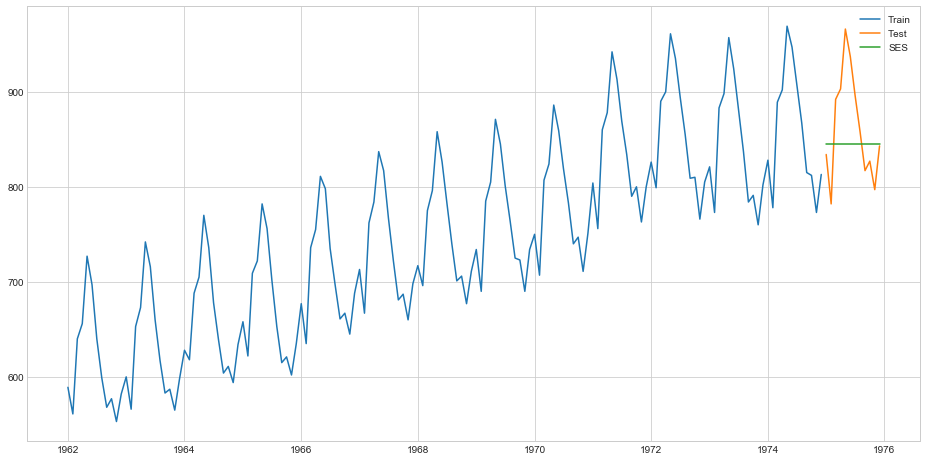

>Predicted=844.989, Expected=834, RMSE=7.770
>Predicted=844.989, Expected=782, RMSE=44.540
>Predicted=844.989, Expected=892, RMSE=33.242
>Predicted=844.989, Expected=903, RMSE=41.020
>Predicted=844.989, Expected=966, RMSE=85.568
>Predicted=844.989, Expected=937, RMSE=65.062
>Predicted=844.989, Expected=896, RMSE=36.070
>Predicted=844.989, Expected=858, RMSE=9.200
>Predicted=844.989, Expected=817, RMSE=19.791
>Predicted=844.989, Expected=827, RMSE=12.720
>Predicted=844.989, Expected=797, RMSE=33.933
>Predicted=844.989, Expected=843, RMSE=1.406


In [427]:
#SIMPLE EXPONENTIAL SMOOTHING
#This technique calculates forecasts using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.  
def h_rmse(prediction, target):
    s = sqrt(((prediction - target) ** 2)/2)
    return s


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['MilkProd'])).fit(smoothing_level=0.08,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

ses_list=list()
for a in test['MilkProd']:
    for p in y_hat_avg['SES']:
        rmse=h_rmse(p,a)
    ses_list.append(rmse)
    print('>Predicted=%.3f, Expected=%3.f, RMSE=%.3f' % (p, a, rmse))

In [428]:
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.SES))
print(rms)

56.978645249049066


In [429]:
print(ses_list)

[7.770185218536, 44.53973784023647, 33.242008090283754, 41.020182683335776, 85.56790989808827, 65.06181324367839, 36.070435215029946, 9.200377529941141, 19.79100049870731, 12.719932686841831, 33.933136122438256, 1.4062241878570718]


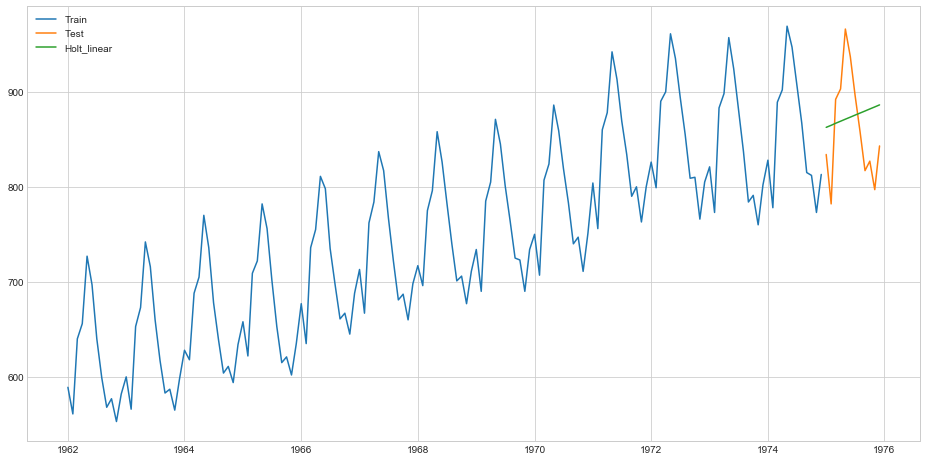

>Predicted=886.193, Expected=834, RMSE=36.906
>Predicted=886.193, Expected=782, RMSE=73.676
>Predicted=886.193, Expected=892, RMSE=4.106
>Predicted=886.193, Expected=903, RMSE=11.884
>Predicted=886.193, Expected=966, RMSE=56.432
>Predicted=886.193, Expected=937, RMSE=35.926
>Predicted=886.193, Expected=896, RMSE=6.934
>Predicted=886.193, Expected=858, RMSE=19.936
>Predicted=886.193, Expected=817, RMSE=48.927
>Predicted=886.193, Expected=827, RMSE=41.856
>Predicted=886.193, Expected=797, RMSE=63.069
>Predicted=886.193, Expected=843, RMSE=30.542


In [430]:
#HOLT'S LINEAR TREND
#This technique takes into account trend and maps the trend without any assumptions.
#Previous techniques can be applied to trend too but Naive approach for example would assume that trend between the last two points is going to stay the same.

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['MilkProd'])).fit(smoothing_level = 0.012,smoothing_slope = 0.022)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

holtlin_list=list()
for a in test['MilkProd']:
    for p in y_hat_avg['Holt_linear']:
        rmse=h_rmse(p,a)
    holtlin_list.append(rmse)   
    print('>Predicted=%.3f, Expected=%3.f, RMSE=%.3f' % (p, a, rmse))

In [431]:
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.Holt_linear))
print(rms)

57.516049295465855


In [432]:
print(holtlin_list)

[36.90615447259605, 73.67570709429653, 4.106038836223705, 11.884213429275727, 56.431940644028224, 35.92584398961834, 6.934465960969896, 19.93559172411891, 48.926969752767356, 41.85590194090188, 63.06910537649831, 30.542193441917124]


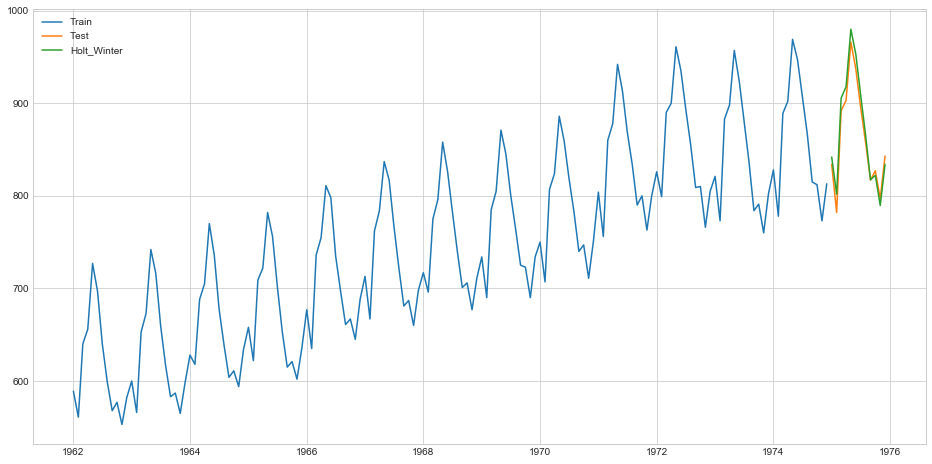

>Predicted=833.997, Expected=834, RMSE=0.002
>Predicted=833.997, Expected=782, RMSE=36.767
>Predicted=833.997, Expected=892, RMSE=41.014
>Predicted=833.997, Expected=903, RMSE=48.793
>Predicted=833.997, Expected=966, RMSE=93.340
>Predicted=833.997, Expected=937, RMSE=72.834
>Predicted=833.997, Expected=896, RMSE=43.843
>Predicted=833.997, Expected=858, RMSE=16.973
>Predicted=833.997, Expected=817, RMSE=12.019
>Predicted=833.997, Expected=827, RMSE=4.948
>Predicted=833.997, Expected=797, RMSE=26.161
>Predicted=833.997, Expected=843, RMSE=6.366


In [433]:
#HOLT-WINTERS
#This method has a seasonality factor.
#It comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['MilkProd']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['MilkProd'], label='Train')
plt.plot(test['MilkProd'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

holtwin_list=list()
for a in test['MilkProd']:
    for p in y_hat_avg['Holt_Winter']:
        rmse=h_rmse(p,a)
      
    holtwin_list.append(rmse)
    print('>Predicted=%.3f, Expected=%3.f, RMSE=%.3f' % (p, a, rmse))
        
#rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.Holt_Winter))
#print(rms)

In [434]:
rms = sqrt(mean_squared_error(test.MilkProd, y_hat_avg.Holt_Winter))
print(rms)

11.922438143498619


In [435]:
print(holtwin_list)

[0.0021795977495329116, 36.76737302395094, 41.01437290656929, 48.792547499621314, 93.3402747143738, 72.83417805996393, 43.842800031315484, 16.972742346226674, 12.018635682421776, 4.9475678705563, 26.160771306152725, 6.36614062842846]


(-0.55, 11.55, -10.390131269416743, 249.1296887906072)

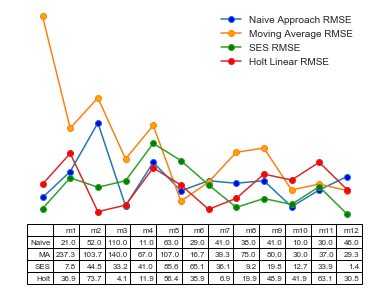

In [436]:
plt.style.use('seaborn-whitegrid')
plt.plot(naive_list,marker='o', markerfacecolor='blue', label='Naive Approach RMSE')
plt.plot(movavg_list, marker='o', markerfacecolor='orange', label= 'Moving Average RMSE')
plt.plot(ses_list, marker='o', markerfacecolor='green', label= 'SES RMSE')
plt.plot(holtlin_list, marker='o', markerfacecolor='red', label= 'Holt Linear RMSE')
#plt.plot(holtwin_list, marker='o', markerfacecolor='violet', label= 'Holt Winters RMSE')
plt.legend()
text= [['','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12'], 
       ['Naive',21.0, 52.0, 110.0, 11.0, 63.0, 29.0, 41.0, 38.0, 41.0, 10.0, 30.0, 46.0], 
       ['MA',237.3, 103.7, 140.0, 67.0, 107.0, 16.7, 39.3, 75.0, 80.0, 30.0, 37.0, 29.3], 
       ['SES',7.8, 44.5, 33.2, 41.0, 85.6, 65.1, 36.1, 9.2, 19.8, 12.7, 33.9, 1.4], 
       ['Holt',36.9, 73.7, 4.1, 11.9, 56.4, 35.9, 6.9, 19.9, 48.9, 41.9, 63.1, 30.5]]
plt.table(cellText=text, rowLoc='right')
plt.axis('off') ##try to get just y axis to show
